In [1]:
import pandas as pd
import ydata_profiling
from pandas.api.types import is_string_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
import statsmodels.api as sm
import ydata_profiling
import re
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Modelo 1


In [2]:
train = pd.read_csv('C:\\Users\\ezequ\\env\\train_set_values.csv')
etiqueta=pd.read_csv('C:\\Users\\ezequ\\env\\training_set_labels.csv')
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
etiqueta

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


Se une train con etiqueta

In [4]:
train = train.merge(etiqueta, on = "id", how = "inner")

In [5]:
var_obj = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train['status_group'] = etiqueta['status_group'].replace(var_obj)

In [6]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [7]:
correlation_matrix = train.corr()
correlation_matrix.sort_values(ascending=False, by='status_group')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
status_group,0.004049,-0.053702,-0.114029,0.004366,-0.014547,-0.005021,0.108640,0.065687,-0.017759,-0.043342,1.000000
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724,0.108640
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315,0.065687
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732,0.004366
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082,0.004049
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056,-0.005021
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278,-0.014547
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910,-0.017759
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000,-0.043342
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915,-0.053702


Se puede observar que hay una alta correlación entre las variables gps_height y construction_year, lo que podría sugerir una posible relación causal entre ellas, También se observa una correlación significativa entre las variables region_code y district_code. Esto se puede tomar en cuenta para algun modelo que se intente mostrar.

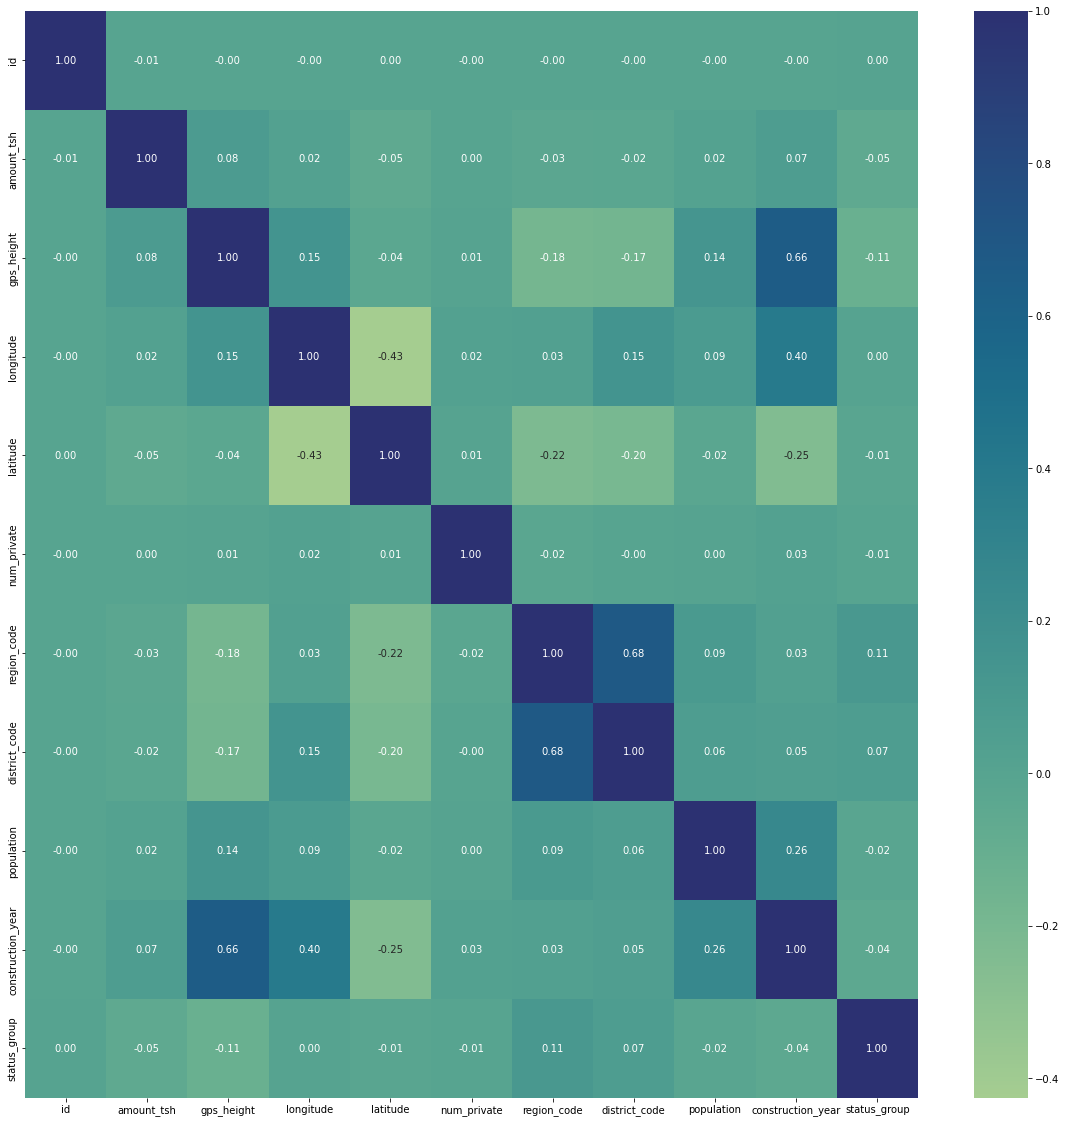

In [8]:
correlation_matrix = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(correlation_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

En el gráfico se observa que la mayoría de bombas fueron construidas hace varios años y la mayoría de esas no funcionan, entonces podría ser útil agregarla en el modelo.

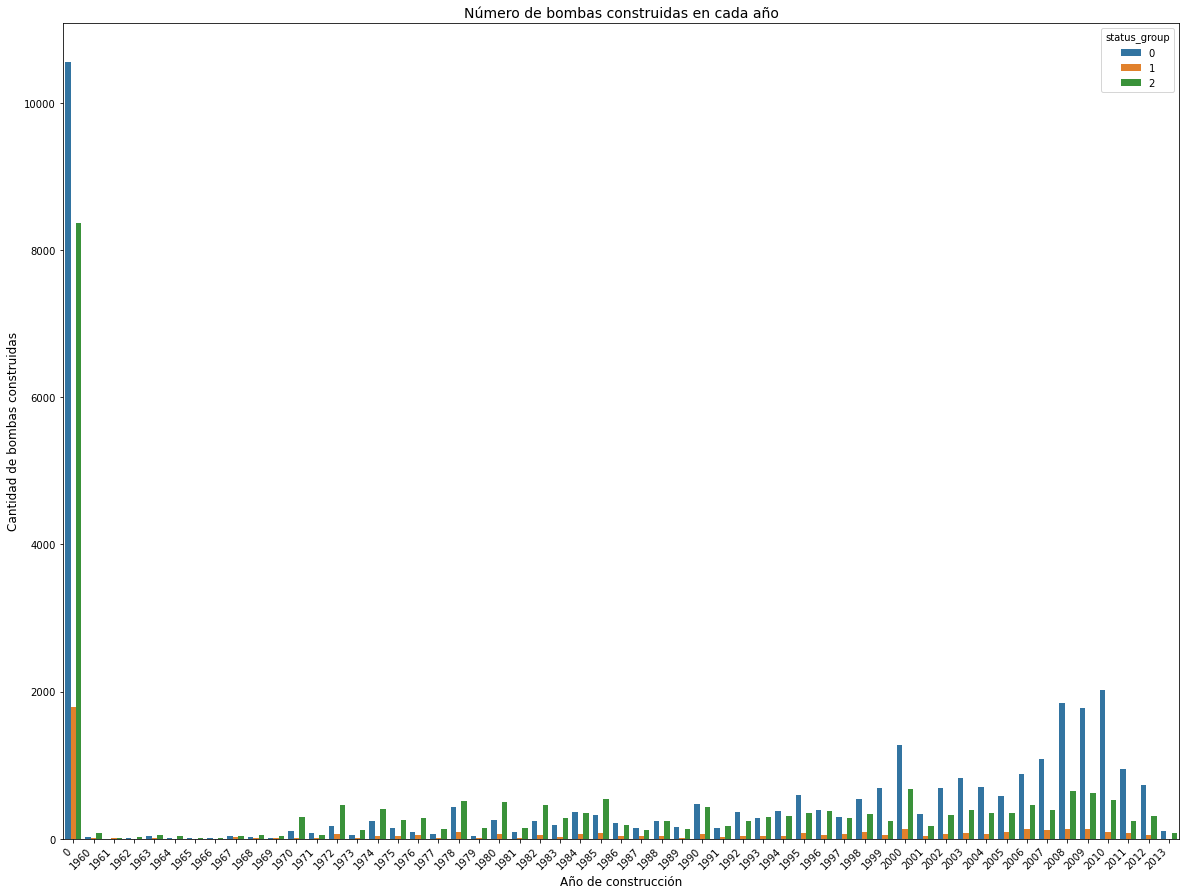

In [9]:
plt.figure(figsize=(20, 15))
sns.countplot(x=train["construction_year"], hue=train["status_group"])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Número de bombas construidas en cada año", fontsize=14)
plt.xlabel("Año de construcción", fontsize=12)
plt.ylabel("Cantidad de bombas construidas", fontsize=12)
plt.show()

Se cuenta el número de valores nulos o faltantes de cada variable

In [10]:
train.apply(lambda x : sum(x.isnull()), axis = 0)

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Se procede a eliminar todas las filas donde hayan valores nulos

In [11]:
moda = train[['funder', 'installer', 'scheme_management', 'permit', 'public_meeting']].mode().iloc[0]
train.fillna(value=moda, inplace=True)

Al tener "recorded_by" todas las filas con el mismo dato, se procede a eliminarla 

In [12]:
train=train.drop(['recorded_by'],axis=1)

Se observa que ambas columnas contienen información muy similar o igual

In [13]:
train[['waterpoint_type_group', 'waterpoint_type']]

,waterpoint_type_group,waterpoint_type
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe,communal standpipe multiple
3,communal standpipe,communal standpipe multiple
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


Se procede a eliminar 1 porque muestran lo mismo 

In [14]:
train=train.drop(['waterpoint_type'],axis=1)

Lo mismo con quantity y quantity_group

In [15]:
train[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [16]:
train=train.drop(['quantity_group'],axis=1)

Contiene algunos valores diferentes pero se va a tratar de observar un poco más a detalle

In [17]:
train[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [18]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [19]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [20]:
train = train.drop(['payment'], axis=1)

Se convierten las variables categóricas en numéricas a través de LabelEncoder

In [21]:
number = preprocessing.LabelEncoder()
train = train.astype(str)
train = train.apply(number.fit_transform)
train = train.fillna(-999)

In [22]:
test = pd.read_csv('C:\\Users\\ezequ\\env\\test_set_values.csv')

In [23]:
test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


Se procede a realizar los mismos pasos en 

In [24]:
test.apply(lambda x : sum(x.isnull()), axis = 0)

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

Se procede a eliminar todas las filas donde hayan valores nulos

In [25]:
moda = test[['funder', 'installer', 'scheme_management', 'permit', 'public_meeting']].mode().iloc[0]
test.fillna(value=moda, inplace=True)

Al tener todas las filas con el mismo dato, se procede a eliminarla 

In [26]:
test=test.drop(['recorded_by'],axis=1)

Se observa que ambas columnas contienen información muy similar o igual

In [27]:
test[['waterpoint_type_group', 'waterpoint_type']]

,waterpoint_type_group,waterpoint_type
0,other,other
1,communal standpipe,communal standpipe
2,other,other
3,other,other
4,communal standpipe,communal standpipe
...,...,...
14845,communal standpipe,communal standpipe
14846,hand pump,hand pump
14847,communal standpipe,communal standpipe
14848,communal standpipe,communal standpipe


Se procede a eliminar 1 de las 2 variables porque muestran lo mismo 

In [28]:
test = test.drop(['waterpoint_type'], axis=1)

In [29]:
test[['quantity', 'quantity_group']]

,quantity,quantity_group
0,seasonal,seasonal
1,insufficient,insufficient
2,insufficient,insufficient
3,dry,dry
4,enough,enough
...,...,...
14845,enough,enough
14846,insufficient,insufficient
14847,insufficient,insufficient
14848,insufficient,insufficient


In [30]:
test=test.drop(['quantity_group'],axis=1)

In [31]:
test[['payment', 'payment_type']]

,payment,payment_type
0,never pay,never pay
1,never pay,never pay
2,never pay,never pay
3,unknown,unknown
4,pay monthly,monthly
...,...,...
14845,never pay,never pay
14846,pay annually,annually
14847,never pay,never pay
14848,never pay,never pay


In [32]:
test['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [33]:
test['payment_type'].value_counts()

never pay     6364
per bucket    2281
monthly       2097
unknown       1992
annually       928
on failure     928
other          260
Name: payment_type, dtype: int64

In [34]:
test = test.drop(['payment'], axis=1)

Se convierten las variables categóricas a numericas a través de label Encoder para test

In [35]:
number = preprocessing.LabelEncoder()
test = test.astype(str)
test = test.apply(number.fit_transform)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('status_group', axis=1), train['status_group'], test_size=0.25, random_state=42)


XGB Classifier con modelo 1

In [37]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=6, learning_rate=0.1, n_estimators=100, seed=42)

In [38]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [39]:
y_pred = model.predict(X_test)

Este modelo tiene una precisión alta para para la clase 0, de un 76%, en otras palabras la mayoria de veces predice que es funcional lo termina siendo. Pero este modelo tiene dificultades en la clase 1 (reparacion) para identificar cuando la bomba necesita reparación. Con respecto al  modelo al hacer la matriz de confusión, nos dice que el modelo tiene buen desempeño en la clasificación de "functional " pero no tan buen desempeño para "functional needs repair"

In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      8098
           1       0.62      0.17      0.27      1074
           2       0.85      0.68      0.76      5678

    accuracy                           0.78     14850
   macro avg       0.74      0.59      0.62     14850
weighted avg       0.78      0.78      0.76     14850

[[7477   80  541]
 [ 747  185  142]
 [1759   33 3886]]


El score del modelo1 usando XGB Classifier es de 77,76%

In [41]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score del modelo:", score)

Score del modelo: 0.7776430976430977


In [42]:
envio_format = pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [43]:
envio_format

,status_group
id,
50785,predicted label
51630,predicted label
17168,predicted label
45559,predicted label
49871,predicted label
...,...
39307,predicted label
18990,predicted label
28749,predicted label


No venian en la misma fila id y status group y se intento modificar

In [44]:
envio = pd.DataFrame({'id': envio_format.index, 'status_group': y_pred})

In [45]:
envio

,id,status_group
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0
...,...,...
14845,39307,0
14846,18990,0
14847,28749,0
14848,33492,0


Se reemplaza los valores numéricos de status_group a valores "funcional", "non functional" y "functional needs repair", tambien el codigo dice cuantas bombas estan en cada grupo según el modelo estimado 

In [46]:
target_status_group2 = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio['status_group'] = envio['status_group'].replace(target_status_group2)
envio['status_group'].value_counts()

functional                 9983
non functional             4569
functional needs repair     298
Name: status_group, dtype: int64

In [47]:
envio.to_csv('prueba_1.csv', index=False)

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(X_train, y_train)


GaussianNB()

In [50]:
y_pred = gnb.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

Precisión: 0.5977104377104377


In [52]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      8098
           1       0.18      0.16      0.17      1074
           2       0.58      0.57      0.57      5678

    accuracy                           0.60     14850
   macro avg       0.47      0.47      0.47     14850
weighted avg       0.59      0.60      0.60     14850

[[5454  549 2095]
 [ 618  175  281]
 [2197  234 3247]]


Arbol de Decisión con modelo 1

In [53]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
ypred_arbol= arbol.predict(X_test)

In [55]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, arbol.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, ypred_arbol))

Train set Accuracy:  0.7069809203142536
Test set Accuracy:  0.7081481481481482


El reporte de clasificación muestra que el modelo tiene alta precision para "functional" y "non functional" pero es baja su performance para "needs perair". El problema es el recall de la clase 1, donde el modelo sólo pudo identificar 1% de los casos reales.

In [56]:
print(classification_report(y_test, ypred_arbol))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      8098
           1       0.62      0.01      0.01      1074
           2       0.79      0.54      0.65      5678

    accuracy                           0.71     14850
   macro avg       0.70      0.49      0.48     14850
weighted avg       0.72      0.71      0.67     14850



In [57]:
envio_format1= pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [58]:
envio_arbol = pd.DataFrame({'id': envio_format.index, 'status_group': ypred_arbol})

In [59]:
target_status_arbol = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio_arbol['status_group'] = envio_arbol['status_group'].replace(target_status_arbol)
envio_arbol['status_group'].value_counts()

functional                 10949
non functional              3888
functional needs repair       13
Name: status_group, dtype: int64

In [60]:
envio_arbol.to_csv('prueba_arbol1.csv', index=False)

In [61]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [62]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [63]:
y_predgbm = gbm.predict(X_test)

In [64]:
y_predgmb = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_predgbm)
print('Accuracy:', accuracy)

Accuracy: 0.7472053872053872


In [67]:
print(classification_report(y_test, y_predgbm))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      8098
           1       0.55      0.12      0.20      1074
           2       0.83      0.62      0.71      5678

    accuracy                           0.75     14850
   macro avg       0.70      0.55      0.57     14850
weighted avg       0.75      0.75      0.73     14850



In [68]:
envio_formatgbm= pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [69]:
envio_gbm = pd.DataFrame({'id': envio_format.index, 'status_group': y_predgbm})

In [70]:
target_status_gbm = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio_gbm['status_group'] = envio_gbm['status_group'].replace(target_status_gbm)
envio_gbm['status_group'].value_counts()

functional                 10342
non functional              4273
functional needs repair      235
Name: status_group, dtype: int64

In [71]:
envio_gbm.to_csv('prueba_gbm.csv', index=False)

In [72]:
RandomF_Cross = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)

In [73]:
rfc_params = {'n_estimators':[10, 50, 100],
              'max_depth':[10, 20, None],
              'min_samples_split':[2, 15]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy').fit(X_train, y_train)

In [74]:
ypredrf = grid_rfc.predict(X_test)

El modelo tiene buena precisión para el modelo functional y non fuctional pero un poco baja para functional needs repair.

In [75]:
print(confusion_matrix(y_test, ypredrf))
print(classification_report(y_test, ypredrf))

[[7236  199  663]
 [ 567  365  142]
 [1184   97 4397]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      8098
           1       0.55      0.34      0.42      1074
           2       0.85      0.77      0.81      5678

    accuracy                           0.81     14850
   macro avg       0.73      0.67      0.69     14850
weighted avg       0.80      0.81      0.80     14850



In [76]:
envio_format_rf= pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [77]:
envio_rf = pd.DataFrame({'id': envio_format.index, 'status_group': ypredrf})

Luego de juntar la columna id con status group se pasan los valores a string para su posterior análisis.

In [78]:
target_status_rf = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio_rf['status_group'] = envio_rf['status_group'].replace(target_status_rf)
envio_rf['status_group'].value_counts()

functional                 8987
non functional             5202
functional needs repair     661
Name: status_group, dtype: int64

In [79]:
envio_rf.to_csv('RandomF_Cross.csv', index=False)

# Modelo2

In [80]:
train1 = pd.read_csv('C:\\Users\\ezequ\\env\\train_set_values.csv')
etiqueta1=pd.read_csv('C:\\Users\\ezequ\\env\\training_set_labels.csv')

In [81]:
train1 = train1.merge(etiqueta1, on = "id", how = "inner")

In [82]:
var_obj = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train1['status_group'] = etiqueta1['status_group'].replace(var_obj)

Se cuenta el número de valores nulos o faltantes de cada variable

In [83]:
train1.apply(lambda x : sum(x.isnull()), axis = 0)

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

En vez de aplicar la moda como en el modelo 1, para solucionar valores nulos se va a eliminar las filas de las variables previamente utilizadas

In [84]:
train1.dropna(subset=['funder', 'installer', 'scheme_management', 'permit', 'public_meeting'], inplace=True)

Se pasa date_recorded a formato datetime

In [85]:
train1.date_recorded = pd.to_datetime(train1.date_recorded)

In [86]:
print(train1.dtypes)

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


Se convierte la columna "date_recorded" en valores de fecha y hora de formato datetime para poder realizar cálculos de fechas y horas

In [87]:
train1['date_recorded'] = pd.to_datetime(train1['date_recorded'])

Se calcula la cantidad de días transcurridos 

In [88]:
most_recent_date = train1['date_recorded'].max()

Se calcula la cantidad de días transcurridos entre cada fecha en la columna "date_recorded" del dataframe train1 y la fecha más reciente en esa misma columna

In [89]:
train1['días transcurridos'] = (most_recent_date - train1['date_recorded']).dt.days

Se elimina date_recorded y las mismas variables que en el modelo 1

In [90]:
train1 = train1.drop("date_recorded",axis=1)

In [91]:
train1= train1.drop(['waterpoint_type','quantity_group'], axis=1)

In [92]:
number = preprocessing.LabelEncoder()
train1 = train1.astype(str)
train1 = train1.apply(number.fit_transform)

In [93]:
test1= pd.read_csv('C:\\Users\\ezequ\\env\\test_set_values.csv')

Se procede hacer los mismos pasos que en train1 pero para test1

In [94]:
test1.dropna(subset=['funder', 'installer', 'scheme_management', 'permit', 'public_meeting'], inplace=True)

Se convierte date_recorded a formato datetime

In [95]:
test1.date_recorded = pd.to_datetime(test1.date_recorded)

In [96]:
test1['date_recorded'] = pd.to_datetime(test1['date_recorded'])

In [97]:
print(test1['date_recorded'].dtypes)

datetime64[ns]


In [98]:
test1['date_recorded'] = pd.to_datetime(test1['date_recorded'])

In [99]:
most_recent_date = test1['date_recorded'].max()

In [100]:
test1['días transcurridos'] = (most_recent_date - test1['date_recorded']).dt.days

In [101]:
test1 = test1.drop("date_recorded",axis=1)

In [102]:
test1= test1.drop(['waterpoint_type','quantity_group'], axis=1)

In [103]:
number = preprocessing.LabelEncoder()
test1 = test1.astype(str)
test1 = test1.apply(number.fit_transform)

In [104]:
X = train1.drop('status_group', axis=1)
y = train1['status_group']

Se tuvo que ajustar el test_size para que coincidiera el y_pred1 con submission1 y al final quedo en test_size en 0.30522

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30522, random_state=40)

In [106]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=40)
random_forest.fit(X_train1, y_train1)

RandomForestClassifier(random_state=40)

In [107]:
y_pred1 = random_forest.predict(X_test1)

la precisión de este modelo es de 81,13%

In [108]:
acc_random_forest = accuracy_score(y_test1, y_pred1)
print(acc_random_forest)

0.8131313131313131


En general el modelo predice bien aunque con algunos problemas para functional needs repair 

In [109]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8206
           1       0.54      0.32      0.40      1022
           2       0.84      0.79      0.82      5622

    accuracy                           0.81     14850
   macro avg       0.73      0.67      0.69     14850
weighted avg       0.81      0.81      0.81     14850

[[7290  216  700]
 [ 546  330  146]
 [1101   66 4455]]


In [110]:
envio_format1 = pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [111]:
envio_format1

,status_group
id,
50785,predicted label
51630,predicted label
17168,predicted label
45559,predicted label
49871,predicted label
...,...
39307,predicted label
18990,predicted label
28749,predicted label


In [112]:
envio1 = pd.DataFrame({'id': envio_format1.index, 'status_group': y_pred1})
envio1 = envio1.set_index('id')
envio1 = envio1.reindex(envio_format1.index)
envio1 = envio1.reset_index()

In [113]:
envio1

,id,status_group
0,50785,0
1,51630,2
2,17168,0
3,45559,0
4,49871,0
...,...,...
14845,39307,0
14846,18990,0
14847,28749,0
14848,33492,0


In [114]:
target_status_group2 = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio1['status_group'] = envio1['status_group'].replace(target_status_group2)
envio1['status_group'].value_counts()

functional                 8937
non functional             5301
functional needs repair     612
Name: status_group, dtype: int64

In [115]:
envio1.to_csv('prueba_2.csv', index=False)

En la competencia probe 1ro con un paramentro de n_estimators=150 y despues con 100 

In [116]:
X = train.drop('status_group', axis=1)
y = train['status_group']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('status_group', axis=1), train['status_group'], test_size=0.25, random_state=42)


In [118]:
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [119]:
y_pred2 = rnd_clf.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy)

Accuracy: 0.8086868686868687


In [121]:
envio_format3 = pd.read_csv(r'C:\Users\ezequ\env\SubmissionFormat.csv', index_col='id')

In [122]:
envio3 = pd.DataFrame({'id': envio_format3.index, 'status_group': y_pred2})
envio3 = envio3.set_index('id')
envio3 = envio3.reindex(envio_format3.index)
envio3 = envio3.reset_index()

In [123]:
target_status_group3 = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
envio3['status_group'] = envio3['status_group'].replace(target_status_group2)
envio3['status_group'].value_counts()

functional                 9038
non functional             5176
functional needs repair     636
Name: status_group, dtype: int64

In [124]:
envio3.to_csv('prueba_RF.csv', index=False)